## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Pre Processing

In [20]:
main_data = pd.read_csv('glass source classification dataset.csv', index_col = 'Unnamed: 0')
impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
impute.fit(main_data[['Ca']])
main_data['Ca'] = impute.transform(main_data[['Ca']])
main_data['Ba'] = main_data['Ba'].map({'Does not exist':0, 'exists':1})
main_data['Fe'] = main_data['Fe'].map({'Does not exist':0, 'exists':1})
enc = LabelEncoder()
main_data['Type'] = enc.fit_transform(main_data['Type'])
label_data = main_data[['Type']]
temp_data = main_data.drop(['Type'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(temp_data)
data_scaled = scaler.transform(temp_data)
feature_data = pd.DataFrame(data = data_scaled, columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])

## Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, random_state=1, test_size = 0.2, stratify = label_data)

## Using Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
regression = accuracy_score(y_test, predictions)*100
print(f'Accuracy of Logistic Regression: {regression}%')

Accuracy of Logistic Regression: 81.3953488372093%


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Using Decision Tree

In [33]:
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
decision_tree = accuracy_score(y_test, predictions)*100
print(f'Accuracy of Decision Tree: {decision_tree}%')

Accuracy of Decision Tree: 83.72093023255815%


## Bar Chart Comparison

Text(0.5, 1.0, 'Accuracy Precentage')

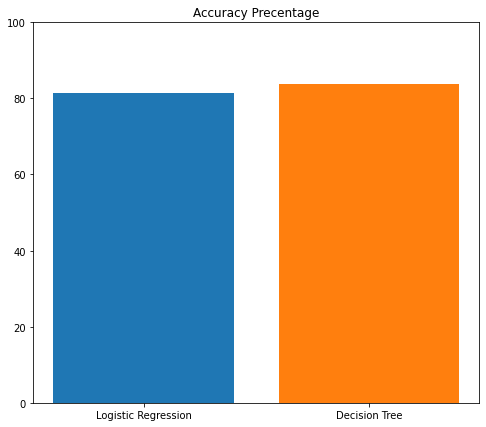

In [34]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_ylim([0, 100])
ax.bar(['Logistic Regression'], [regression])
ax.bar(['Decision Tree'], [decision_tree])
ax.set_title("Accuracy Precentage")